In [36]:
%matplotlib inline

In [122]:
import math
import matplotlib.pyplot as plt
import random
import statistics as st
import seaborn as sns
import numpy as np

In [38]:
class Player:

    def __init__(self, name):
        self.name = name
        self.total_score = 0
        self.turn_score = 0
        self.num_of_rolls = 0

    def get_roll(self):
        self.num_of_rolls += 1
        return random.randint(1, 6)

    def should_roll(self):
        return self.num_of_rolls == 0

    def reset(self):
        self.total_score = 0

    def take_turn(self):
        self.num_of_rolls = 0
        self.turn_score = 0
        while self.should_roll():
            roll = self.get_roll()
            if roll == 1:
                break
            else:
                self.turn_score += roll
        self.total_score += self.turn_score

In [39]:
class TurnPlayer(Player):
    def should_roll(self):
        return self.num_of_rolls < 5

In [40]:
class ScorePlayer(Player):
    def should_roll(self):
        return self.turn_score < 20

In [88]:
class MonsterPlayer(Player):
    def should_roll(self):
        return self.turn_score < 20 and self.num_of_rolls < 5

In [89]:
class Game:
    def __init__(self, players):
        self.players = players
        self.end_total_score = []

    def play(self):
        for _ in range(7):
            for player in self.players:
                player.take_turn()
#             self.show_score()
        # self.end_total_score.append(player.total_score)
        return [player.total_score for player in players]

    def reset(self):
        for player in players:
            player.reset()

#     def show_score(self):
#         for player in self.players:
#             print("{}'s turn score is {}".format(player.name, player.turn_score))
#             print("{}'s total score is {}".format(player.name, player.total_score))

In [90]:
players = [Player("Player"), TurnPlayer("Turn"), ScorePlayer("Score"), MonsterPlayer("Monster")]
game = Game(players)
# game.play()

In [91]:
scores = []
for _ in range(100):
    game.play()
    game.reset()
    scores.append(game.play())
print (scores)

[[19, 56, 82, 55], [37, 74, 82, 108], [17, 84, 90, 70], [21, 74, 65, 77], [27, 107, 81, 55], [18, 89, 60, 65], [22, 31, 53, 92], [33, 60, 78, 114], [19, 73, 86, 59], [26, 74, 98, 70], [23, 99, 109, 53], [20, 76, 68, 81], [27, 92, 81, 51], [33, 84, 111, 65], [23, 114, 74, 95], [22, 74, 56, 49], [27, 99, 30, 89], [16, 112, 97, 55], [28, 105, 69, 90], [22, 80, 106, 120], [28, 59, 85, 102], [22, 100, 90, 103], [30, 95, 66, 81], [23, 91, 70, 71], [20, 93, 85, 97], [18, 99, 102, 96], [26, 59, 139, 74], [30, 87, 119, 93], [13, 64, 81, 68], [22, 93, 64, 82], [19, 101, 94, 57], [25, 58, 102, 126], [22, 87, 84, 81], [24, 117, 110, 59], [24, 140, 69, 90], [26, 81, 83, 109], [24, 35, 123, 98], [24, 101, 92, 88], [17, 104, 105, 74], [29, 83, 96, 97], [33, 106, 120, 126], [23, 131, 81, 62], [16, 85, 132, 76], [29, 99, 77, 75], [22, 87, 90, 83], [27, 83, 125, 102], [34, 63, 84, 70], [26, 100, 106, 78], [21, 71, 74, 67], [21, 64, 101, 41], [26, 82, 110, 107], [34, 76, 69, 100], [22, 82, 118, 86], [15,

In [94]:
player, turn, score, monster = zip(*scores)
print (player)
print (turn)
print (score)
print (monster)

(19, 37, 17, 21, 27, 18, 22, 33, 19, 26, 23, 20, 27, 33, 23, 22, 27, 16, 28, 22, 28, 22, 30, 23, 20, 18, 26, 30, 13, 22, 19, 25, 22, 24, 24, 26, 24, 24, 17, 29, 33, 23, 16, 29, 22, 27, 34, 26, 21, 21, 26, 34, 22, 15, 25, 26, 23, 15, 29, 29, 19, 19, 24, 25, 19, 25, 21, 23, 14, 22, 31, 25, 32, 17, 26, 30, 20, 17, 25, 21, 21, 19, 30, 14, 25, 27, 24, 30, 18, 16, 29, 11, 24, 17, 25, 22, 14, 23, 22, 20)
(56, 74, 84, 74, 107, 89, 31, 60, 73, 74, 99, 76, 92, 84, 114, 74, 99, 112, 105, 80, 59, 100, 95, 91, 93, 99, 59, 87, 64, 93, 101, 58, 87, 117, 140, 81, 35, 101, 104, 83, 106, 131, 85, 99, 87, 83, 63, 100, 71, 64, 82, 76, 82, 95, 84, 72, 101, 113, 105, 102, 79, 66, 125, 94, 148, 67, 90, 97, 50, 65, 102, 84, 56, 74, 109, 90, 41, 84, 102, 91, 56, 77, 93, 98, 91, 92, 98, 52, 90, 83, 110, 104, 81, 45, 65, 79, 71, 78, 53, 115)
(82, 82, 90, 65, 81, 60, 53, 78, 86, 98, 109, 68, 81, 111, 74, 56, 30, 97, 69, 106, 85, 90, 66, 70, 85, 102, 139, 119, 81, 64, 94, 102, 84, 110, 69, 83, 123, 92, 105, 96, 12

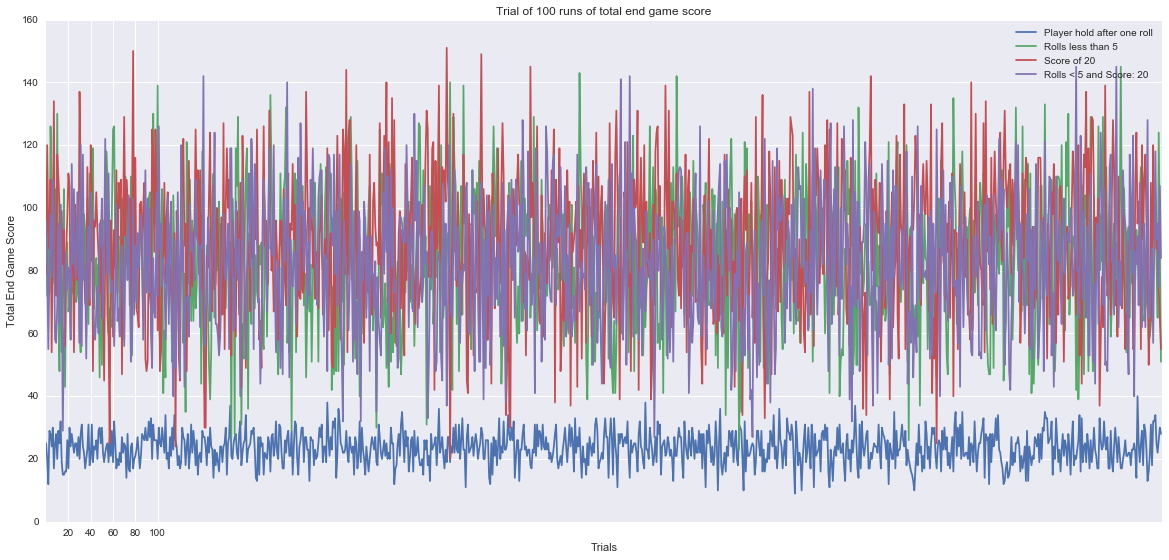

In [106]:
x1 = [20, 40, 60, 80, 100]
y1 = player
y2 = turn
y3 = score
y4 = monster
plt.subplots(figsize=(20, 9))

plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)

plt.xticks(x1)
plt.xlabel('Trials')
plt.ylabel('Total End Game Score')
plt.title('Trial of 100 runs of total end game score')
plt.legend(["Player hold after one roll", "Rolls less than 5", "Score of 20", "Rolls < 5 and Score: 20"], loc='upper right')


plt.show()

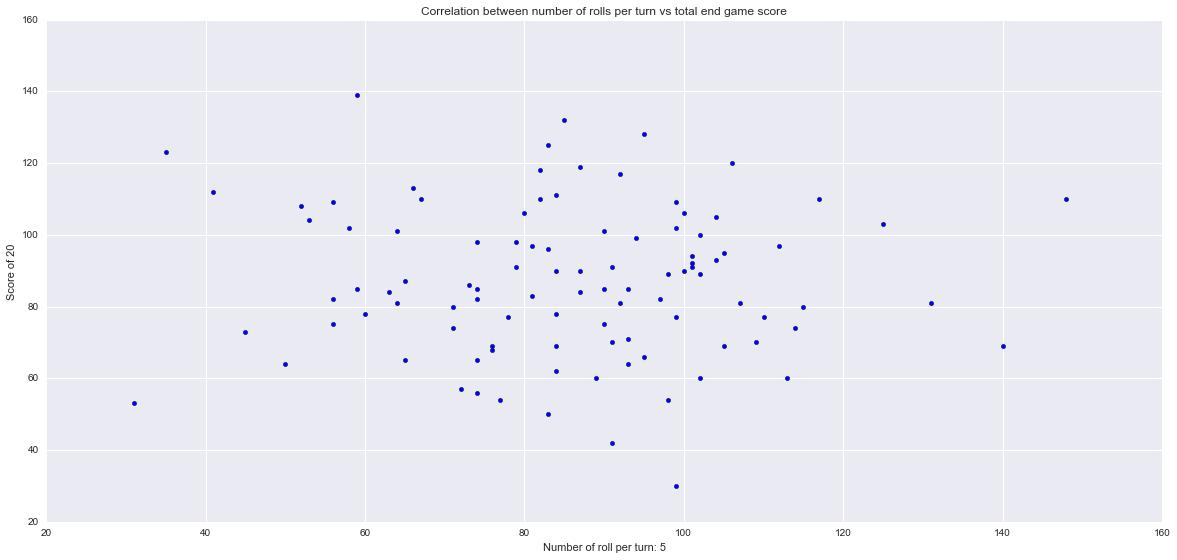

In [101]:
x1 = turn
y1 = score

plt.subplots(figsize=(20, 9))
plt.scatter(x1, y1)

plt.xlabel("Number of roll per turn: 5")
plt.ylabel("Score of 20")
plt.title('Correlation between number of rolls per turn vs total end game score')
plt.show()

In [109]:
scores = []
for _ in range(1000):
    game.play()
    game.reset()
    scores.append(game.play())
print (scores)

[[26, 85, 74, 103], [32, 112, 109, 84], [17, 73, 76, 94], [31, 89, 121, 72], [25, 96, 44, 45], [12, 113, 100, 69], [20, 90, 65, 58], [18, 81, 114, 77], [21, 82, 98, 68], [22, 99, 49, 89], [25, 113, 128, 106], [26, 43, 95, 98], [22, 70, 83, 80], [25, 78, 100, 43], [14, 104, 80, 109], [30, 103, 77, 78], [30, 80, 110, 92], [26, 53, 89, 118], [19, 73, 112, 84], [16, 88, 107, 88], [26, 62, 77, 89], [14, 87, 57, 90], [20, 133, 77, 105], [25, 55, 91, 96], [20, 131, 93, 53], [26, 71, 74, 80], [26, 82, 76, 87], [35, 96, 67, 72], [29, 88, 103, 96], [23, 70, 78, 97], [28, 79, 48, 86], [19, 65, 117, 87], [21, 91, 94, 84], [27, 87, 68, 100], [11, 74, 90, 44], [21, 86, 71, 84], [21, 121, 121, 91], [23, 105, 77, 40], [23, 82, 33, 64], [24, 89, 118, 105], [17, 38, 109, 56], [20, 82, 77, 85], [16, 111, 75, 82], [18, 102, 74, 95], [13, 74, 89, 60], [23, 77, 59, 65], [37, 115, 106, 102], [23, 87, 83, 80], [28, 60, 89, 99], [13, 99, 69, 69], [23, 90, 102, 95], [21, 56, 121, 52], [25, 66, 81, 59], [26, 108

In [110]:
player1, turn1, score1, monster1 = zip(*scores)
print (player)
print (turn)
print (score)
print (monster)

(25, 20, 12, 29, 28, 24, 30, 17, 25, 28, 20, 29, 25, 32, 19, 15, 15, 16, 16, 26, 17, 30, 24, 28, 25, 22, 25, 25, 21, 27, 20, 28, 31, 24, 22, 17, 20, 23, 31, 18, 20, 31, 19, 24, 23, 26, 20, 29, 30, 25, 30, 22, 19, 22, 24, 25, 19, 27, 21, 29, 19, 32, 25, 17, 20, 18, 22, 19, 27, 22, 25, 24, 14, 28, 17, 16, 24, 25, 17, 20, 21, 23, 27, 22, 17, 21, 28, 27, 26, 30, 26, 26, 32, 27, 33, 20, 31, 26, 26, 26, 20, 30, 25, 24, 30, 26, 22, 34, 20, 22, 17, 27, 21, 30, 23, 34, 26, 24, 18, 21, 17, 19, 30, 27, 26, 18, 24, 28, 17, 22, 31, 22, 29, 25, 18, 26, 15, 21, 22, 19, 29, 27, 27, 24, 18, 27, 22, 30, 24, 23, 14, 23, 18, 22, 19, 16, 24, 24, 19, 24, 25, 30, 15, 25, 27, 37, 21, 20, 25, 27, 28, 22, 20, 28, 32, 18, 22, 25, 26, 34, 19, 23, 24, 25, 29, 28, 30, 23, 14, 13, 27, 15, 27, 24, 25, 15, 22, 21, 20, 27, 25, 16, 27, 28, 21, 24, 32, 22, 20, 31, 30, 22, 17, 17, 26, 22, 27, 29, 21, 21, 29, 15, 24, 32, 31, 20, 15, 24, 26, 30, 30, 19, 27, 27, 23, 23, 13, 27, 26, 26, 18, 23, 20, 21, 25, 30, 27, 31, 19, 24,

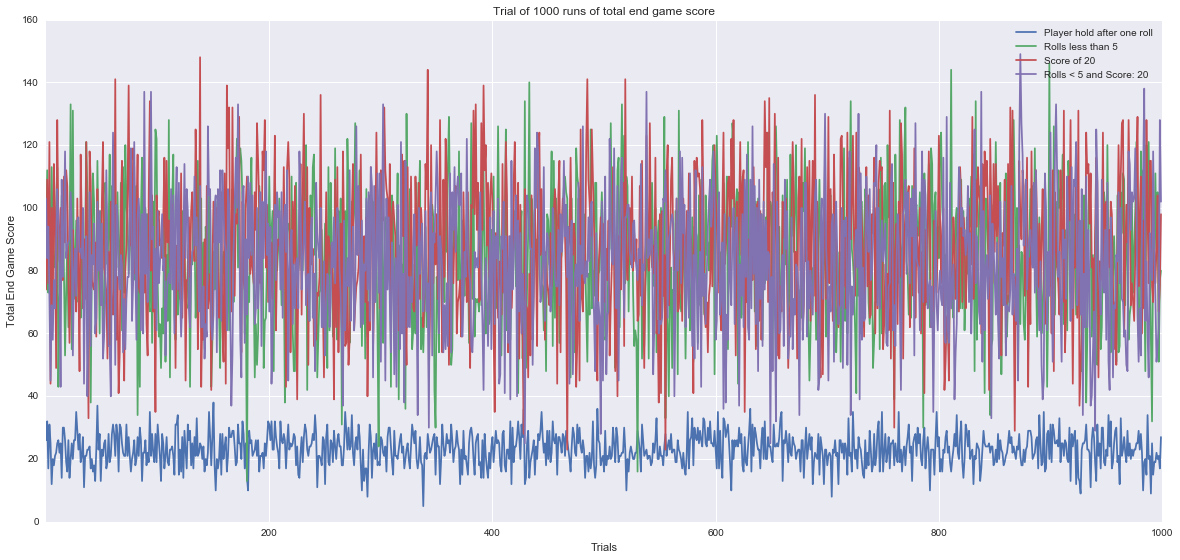

In [111]:
x1 = [200, 400, 600, 800, 1000]
y1 = player1
y2 = turn1
y3 = score1
y4 = monster1
plt.subplots(figsize=(20, 9))

plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)

plt.xticks(x1)
plt.xlabel('Trials')
plt.ylabel('Total End Game Score')
plt.title('Trial of 1000 runs of total end game score')
plt.legend(["Player hold after one roll", "Rolls less than 5", "Score of 20", "Rolls < 5 and Score: 20"], loc='upper right')


plt.show()

In [142]:
meanplayer, stdevplayer = st.mean(player1), round(st.stdev(player1),2)
meanturn, stdevturn = st.mean(turn1), round(st.stdev(turn1),2)
meanscore, stdevscore = st.mean(score1), round(st.stdev(score1),2)
meanmonster, stdevmonster = st.mean(monster1), round(st.stdev(monster1),2)


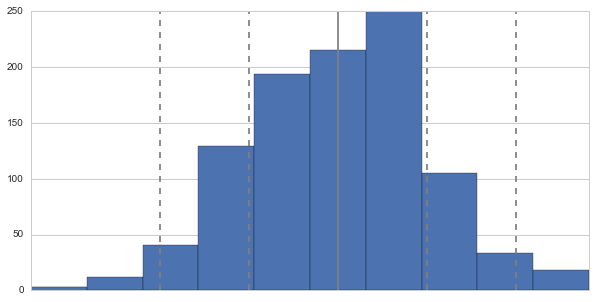

In [145]:
sns.set(style="whitegrid")
plt.subplots(figsize=(10, 5))
x1 = [200, 400, 500, 600, 800, 1000]
plt.xticks(x1)

plt.hist(player1)
mean = st.mean(player1)
stdev = st.stdev(player1)

plt.vlines(mean, ymin, ymax, color='grey')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='grey', linestyles='dashed')
plt.show()

In [143]:
sns.barplot("day", "total_bill", data=meanplayer, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")

AttributeError: 'float' object has no attribute 'get'